<a href="https://colab.research.google.com/github/InnaAndreeva/mmo_labs/blob/master/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6

## Ансамбли моделей машинного обучения.

Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

### Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [0]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import median_absolute_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Enable inline plots
%matplotlib inline

## Выбор набора данных(датасета) и исследование его

In [2]:
data = pd.read_csv('camera_dataset.csv', sep=',')
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [3]:
data.shape 

(1038, 13)

In [4]:
data.dtypes 

Model                       object
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [5]:
data.isnull().sum() 

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

## Удаление или заполнение пропусков и кодирование категориальных признаков

In [0]:
# кодирование категориальных признаков числовыми
le = LabelEncoder()
data['Model'] = le.fit_transform(data['Model'])

In [0]:
# заполнение 0 пропусков
data = data.fillna(0)

In [8]:
data.dtypes

Model                        int64
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [9]:
data.isnull().sum() 

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

In [10]:
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


## С использованием метода train_test_split разделение выборки на обучающую и тестовую.

Разделим данные на целевой столбец и признаки.

In [0]:
 # Перейдем к разделению выборки на обучающую и тестовую.
X = data.drop('Price',axis = 1).values 
y = data['Price'].values 

Разделим выборку на тренировочную и тестовую.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(934, 12)
(934,)
(104, 12)
(104,)


## Обучение моделей

In [0]:
def test_model(model):
    print("mean_absolute_error:", mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:", median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:", r2_score(y_test, model.predict(X_test)))

In [15]:
rand_forest = RandomForestRegressor(n_estimators=40)
rand_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
test_model(rand_forest)

mean_absolute_error: 107.40961538461536
median_absolute_error: 25.80000000000001
r2_score: 0.6977728057694944


In [17]:
gr_b = GradientBoostingRegressor(n_estimators=200)
gr_b.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
test_model(gr_b)

mean_absolute_error: 129.25491530611214
median_absolute_error: 55.75679717112452
r2_score: 0.7014463209236989


Градиентный бустинг оказался несколько хуже по сравнению со случайным
лесом.

## Подбор гиперпараметра n


### Случайный лес


In [19]:
param_range = np.arange(10, 201, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
         140, 150, 160, 170, 180, 190, 200])}]

In [20]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2", return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

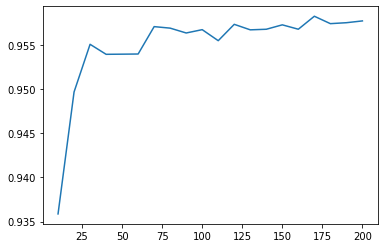

In [21]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

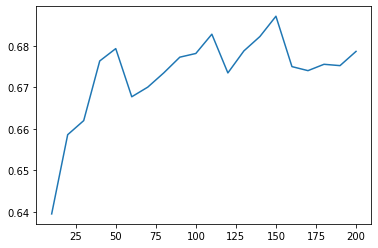

In [22]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [23]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 97.82846153846154
median_absolute_error: 27.26666666666665
r2_score: 0.7681896302883974


Конкретно данная модель оказалась заметно лучше, чем исходная.

### Градиентный бустинг

In [24]:
tuned_parameters

[{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
         140, 150, 160, 170, 180, 190, 200])}]

In [25]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2", return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

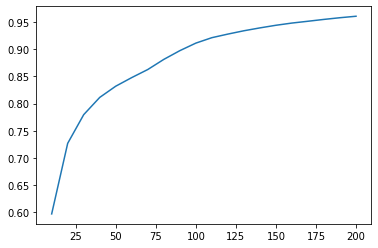

In [26]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

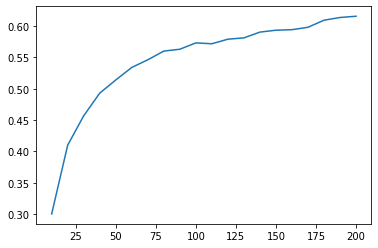

In [27]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [28]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 128.05688631388736
median_absolute_error: 55.7567971711246
r2_score: 0.7041796386905111


## Вывод

При выполнении лабораторной работы были использованы следующие ансамблевые модели: случайный лес и градиентный бустинг для предсказания целевого признака. Точность модели была определена при помощи трех метрик: средняя абсолютная ошибка, медианная абсолютная ошибка и коэффициент детерминации. Изначально гиперпараметры для алгоритмов подбирались произвольно, затем был осуществлен поиск гиперпараметров при помощи GridSearchCV. По результатам вычислений можно сделать вывод о том, что градиентный бустинг работает немного хуже, чем случайный лес на данной выборке.